# Analýza dat z tahového diagramu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
%matplotlib inline

Dva datové soubory .xls obsahující data z tahové zkoušky jsme získali z věřejně přístupných [zdrojů]( 
https://professorkazarinoff.github.io/Engineering-Materials-Programming/07-Mechanical-Properties/plotting-stress-strain-curves.html). Popisují naměřená data při zkoušce oceli 1045 slitiny hliníku 6061. 

## Načtení dat z Excelu

Nejdříve si pomocí funkce ```%ls``` ověříme, že nás adresář obsahuje data z měření. Tato funkce nám vypíše obsah adresáře.  

Pomocí funkce ```pd.read_excel()``` z balíčku pandas je možné přímo načíst data. Data ze dvou excelových souborů budou uložena ve dvou datových objektech nazvaných ```steel_df``` a ```al_df```. Datový objekt pandas je tabulkový datový typ.

K zobrazení prvních pěti řádků každého datového rámce můžeme použít metodu ```.head()```.

In [2]:
%ls ../data/ 
df_al = pd.read_excel('../data/Al60601_raw_data.xls')
df_al.head()

Al60601_raw_data.xls  Steel1018_raw_data.xls


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,542,1,8.470,0.02256,201.146011,-0.001444,0.007552,NaN,NaN,NaN
1,542,2,8.632,0.02330,206.599442,0.000302,0.007552,NaN,NaN,NaN
2,542,3,10.027,0.02846,287.512573,0.003044,0.018898,NaN,NaN,NaN
3,542,4,11.031,0.03232,365.380981,0.009881,0.022061,NaN,NaN,NaN
4,542,5,11.928,0.03616,447.813965,0.014085,0.033652,NaN,NaN,NaN


In [3]:
df_steel = pd.read_excel('../data/Steel1018_raw_data.xls')
df_steel.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,523,1,6.189,0.07302,202.924728,0.000402,-0.028272,NaN,NaN,NaN
1,523,2,6.549,0.07396,205.714890,-0.000238,-0.034549,NaN,NaN,NaN
2,523,3,7.148,0.07624,217.763336,-0.000713,-0.030140,NaN,NaN,NaN
3,523,4,9.146,0.08438,316.306122,0.002377,-0.025968,NaN,NaN,NaN
4,523,5,10.041,0.08822,417.003357,0.003089,-0.024100,NaN,NaN,NaN


Vidíme, že naměřená data obashují různé hodnoty. Pro nás je nejdůležitejší sloupec síla (**FORCE**). Kromě těchto hodnot máme k dispozici ještě hodnotu **EXT** hodnoty prodloužení z mechanického extenzometeru v \% a **CH5**, který obsahuje hodnoty prodloužení z laserového extensometru v \%. 

## Úprava dat

Protože tato data jsme získali z americké laboratoře, máme sílu určenou v librách (pounds) a průmer zkušební tyče je 0.506 palců (inch). Nejdříve musíme tyto hodnoty převést na jednotky SI.

* Pro převod síly nebo hmotnosti z liber (lb) na newtony (N) použijeme následující vztah: 1 lb $\approx$  4,4822162 N.
* Pro převod délky z palců (inch) na milimetry (mm) použijeme následující vztah:
1 inch = 25.4 mm.

:::{note} Síla v **N**, rozměry v **mm**, napětí v **MPa**
 $$1 \frac{\mathrm{N}}{\mathrm{mm}^2} =   1\,10^6 \frac{\mathrm{N}}{\mathrm{m}^2} = 1 \mathrm{MPa}$$
:::

In [4]:
d = 0.506 * 25.4 # mm
force_al = df_al['FORCE'].to_numpy() *  4.4822162#N
force_steel = df_steel['FORCE'].to_numpy() * 4.4822162 #N

Následně si určíme smluvné napětí vydělením síly počátečným průřezem a převedem prodloužení z procent. Protože laserový exntezometr je přesnější, budeme počítat s těmito daty. 

In [5]:
A = np.pi*d**2/4
stress_al = force_al / A
stress_steel = force_steel/A

strain_al = df_al['CH5'].to_numpy()*0.01
strain_steel = df_steel['CH5'].to_numpy()*0.01

## Vykreslení závislosti

Nyní, když máme data z tahového testu připravena, můžeme vytvořit rychlý graf pomocí metody ```ax.plot()``` knihovny Matplotlib. První pár hodnot (x, y), který předáme do ```ax.plot()```, je ( strain_al}, stress_al), a druhý pár (x, y), který předáme, je (strain_steel, stress_steel). Příkaz `plt.show()` zobrazí graf.

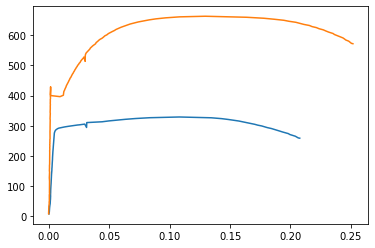

In [6]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al, strain_steel, stress_steel)

plt.show()

Náš graf vylepšíme přidáním popisek jednotlivých křivek a os.

| Matplotlib metoda | Popis |	Příklad |
| --- | --- | --- |
| ax.set_xlabel() | popisek osy x |	plt.xlabel('strain (in/in)') |
| ax.set_ylabel() | popisek osy y |	plt.ylabel('stress (ksi)') |
| ax.set_title() | 	poisek grafu |	plt.title('Stress Strain Curve') |
| ax.legend() |	legenda |	plt.plt(x,y, label='steel') |

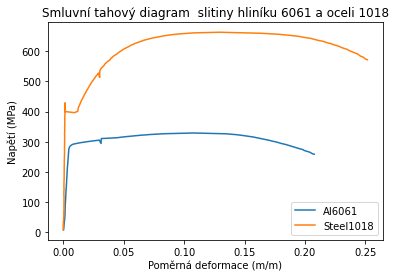

In [7]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_xlabel('Poměrná deformace (m/m)')
ax.set_ylabel('Napětí (MPa)')
ax.set_title('Smluvní tahový diagram  slitiny hliníku 6061 a oceli 1018')
ax.legend(['Al6061','Steel1018'])

plt.show()

Nyní můžeme uložit graf jako obrázek ve formátu .png pomocí metody ```plt.savefig()``` knihovny Matplotlib. Kód níže vytvoří graf a uloží obrázek s názvem `tahovy_diagram.png`. Argument `dpi=300` uvnitř metody `plt.savefig()` specifikuje rozlišení uloženého obrázku. Obrázek bude uložen ve složce ```static``` stejného adresáře jako náš kód.


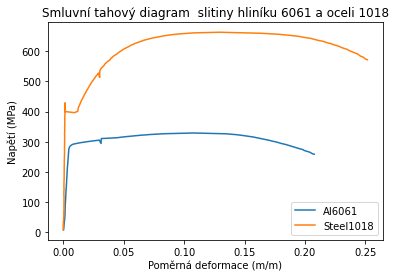

In [8]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al, label = 'Al6061')
ax.plot(strain_steel, stress_steel, label = 'Steel1018')

ax.set_xlabel('Poměrná deformace (m/m)')
ax.set_ylabel('Napětí (MPa)')
ax.set_title('Smluvní tahový diagram  slitiny hliníku 6061 a oceli 1018')
ax.legend()

plt.savefig('static/tahovy_diagram.png', dpi=300)
plt.show()

# Nalezení meze pevnosti

Mez pevnosti je bod na grafu s největší hodnotou napětí. 

In [9]:
uts_steel = np.max(stress_steel)
uts_al = np.max(stress_al)

Pro vykreslení dodáme ještě deformace, ve kterých nastává mez pevnosti

In [10]:
uts_strain_steel = strain_steel[stress_steel==uts_steel][0]
uts_strain_al = strain_al[stress_al==uts_al][0]



print(f'Mez pevnosti pro hliník 6061 je {uts_al} MPa a nastává při poměrném prodloužení {uts_strain_al}.')
print(f'Mez pevnosti pro ocel 1018 je {uts_steel} MPa a nastává při poměrném prodloužení {uts_strain_steel}.')

Mez pevnosti pro hliník 6061 je 328.87169171951257 MPa a nastává při poměrném prodloužení 0.10797487258911133.
Mez pevnosti pro ocel 1018 je 663.4758721964481 MPa a nastává při poměrném prodloužení 0.12940356254577637.


Body si můžeme přidat do grafu.

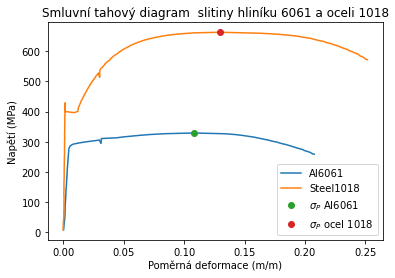

In [11]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al, label = 'Al6061')
ax.plot(strain_steel, stress_steel, label = 'Steel1018')

ax.plot(uts_strain_al, uts_al, "o", label = '$\sigma_P$ Al6061')
ax.plot(uts_strain_steel, uts_steel, "o", label = '$\sigma_P$ ocel 1018')


ax.set_xlabel('Poměrná deformace (m/m)')
ax.set_ylabel('Napětí (MPa)')
ax.set_title('Smluvní tahový diagram  slitiny hliníku 6061 a oceli 1018')
ax.legend()

plt.savefig('static/tahovy_diagram.png', dpi=300)
plt.show()

# Určení Youngova modulu pružnosti

Zvolíme si část křivky, pro kterou je průběh lineárrní. Pro slitinu hliníku to bude přibližně oblast mezi 0 a 250 MPa a pro ocel mezi 0 a 350 MPa.


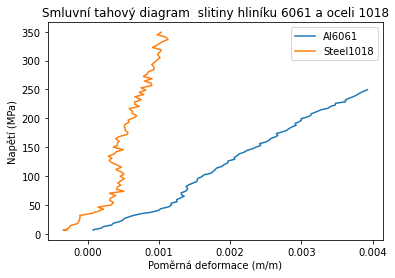

In [12]:
lin_stress_steel = stress_steel[stress_steel<350]
lin_strain_steel = strain_steel[stress_steel<350]

lin_stress_al = stress_al[stress_al<250]
lin_strain_al = strain_al[stress_al<250]

fig,ax = plt.subplots()

ax.plot(lin_strain_al, lin_stress_al, label = 'Al6061')
ax.plot(lin_strain_steel, lin_stress_steel, label = 'Steel1018')

ax.set_xlabel('Poměrná deformace (m/m)')
ax.set_ylabel('Napětí (MPa)')
ax.set_title('Smluvní tahový diagram  slitiny hliníku 6061 a oceli 1018')
ax.legend()

V jednoduchém přístupu použijeme funkci aproximace bodů polynomem prvního stupně. 

In [13]:
param_steel = np.polyfit(lin_strain_steel, lin_stress_steel, 1)
param_al = np.polyfit(lin_strain_al, lin_stress_al, 1)

print(f'Ocel 1018: Napětí = {param_steel[1]} + {param_steel[0]} * deformace')
print(f'Al6061: Napětí = {param_al[1]} + {param_al[0]} * deformace')

Ocel 1018: Napětí = 30.353246542441244 + 267660.33488346846 * deformace
Al6061: Napětí = -13.32484752659266 + 68493.0090973414 * deformace


A zpětné získáme fitovaná data.

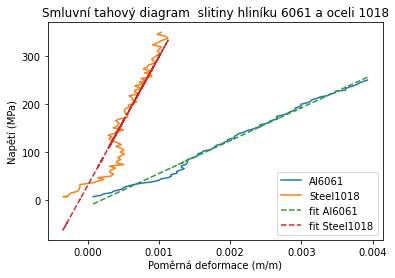

In [14]:
fit_stress_steel = np.polyval(param_steel, lin_strain_steel)
fit_stress_al = np.polyval(param_al, lin_strain_al)

fig,ax = plt.subplots()

ax.plot(lin_strain_al, lin_stress_al, label = 'Al6061')
ax.plot(lin_strain_steel, lin_stress_steel, label = 'Steel1018')
ax.plot(lin_strain_al, fit_stress_al,"--" ,label = 'fit Al6061')
ax.plot(lin_strain_steel, fit_stress_steel,"--", label = 'fit Steel1018')

ax.set_xlabel('Poměrná deformace (m/m)')
ax.set_ylabel('Napětí (MPa)')
ax.set_title('Smluvní tahový diagram  slitiny hliníku 6061 a oceli 1018')
ax.legend()

Sklon přímky nám udáva hodnotu Youngova modulu pružnosti.

In [15]:
print(f'E(ocel 1018) = {param_steel[0]/1000} GPa')
print(f'E(Al6061) = {param_al[0]/1000} GPa')

E(ocel 1018) = 267.66033488346847 GPa
E(Al6061) = 68.4930090973414 GPa


Výsledky můžeme srovnat s výsledky v tabulkách, např. [matweb.com](https://www.matweb.com/search/datasheet_print.aspx?matguid=3a9cc570fbb24d119f08db22a53e2421) nebo [asm.matweb.com](https://asm.matweb.com/search/specificmaterial.asp?bassnum=ma6061t6). Na základě našich měření a hodnot v tabulkách se můžeme pokusit odhadnout o jaký typ zpracování oceli 1018 se jedná. 

Alternativou je využití složitějších modelů k fitování křivek, například knihovna [lmfit](https://lmfit.github.io/lmfit-py/index.html).

[[Model]]
    Model(model_hooke)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 91
    # variables        = 1
    chi-square         = 139374.949
    reduced chi-square = 1548.61055
    Akaike info crit   = 669.399783
    Bayesian info crit = 671.910643
    R-squared          = 0.84966458
[[Variables]]
    E:  307574.304 +/- 6556.48153 (2.13%) (init = 0)


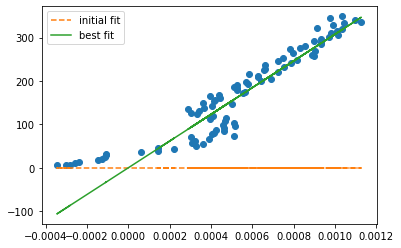

E(ocel 1018) = 307.57430351056655 GPa


In [16]:
def model_hooke(epsilon, E):
    return epsilon * E

emodel = Model(model_hooke)

result = emodel.fit(lin_stress_steel, epsilon=lin_strain_steel, E=0*1e3)

print(result.fit_report())

plt.plot(lin_strain_steel, lin_stress_steel, 'o')
plt.plot(lin_strain_steel, result.init_fit, '--', label='initial fit')
plt.plot(lin_strain_steel, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

print(f'E(ocel 1018) = {result.params["E"]/1000} GPa')